Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


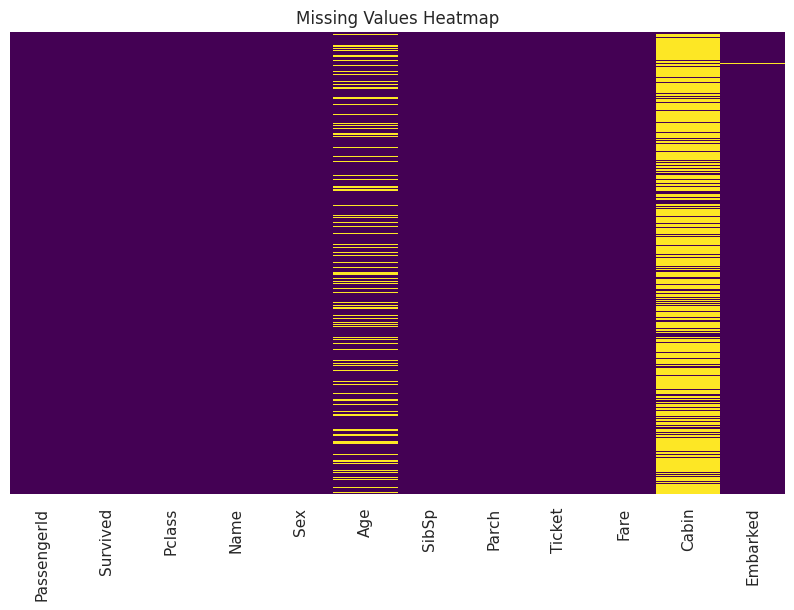

/tmp/ipython-input-2-448529067.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
/tmp/ipython-input-2-448529067.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

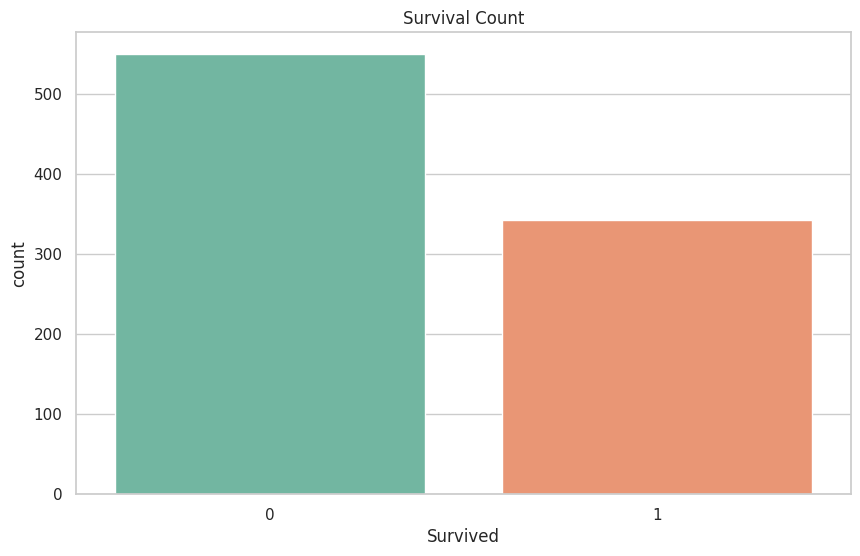

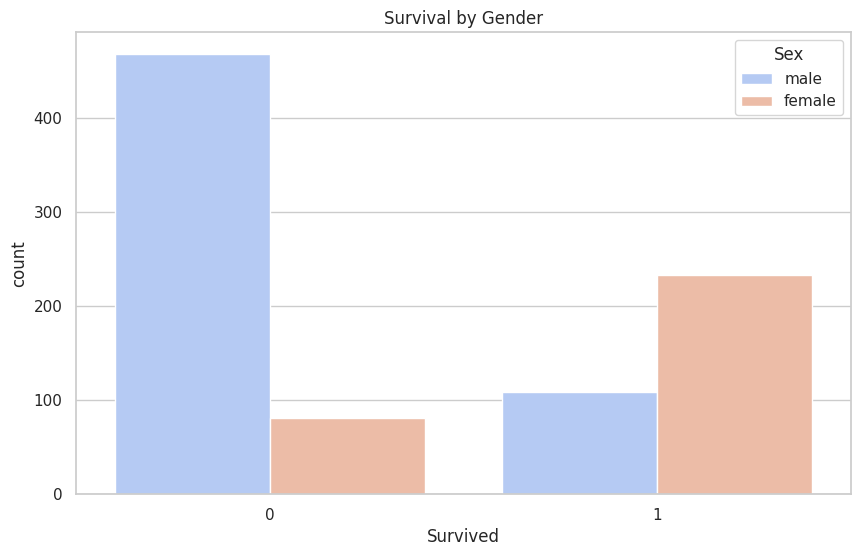

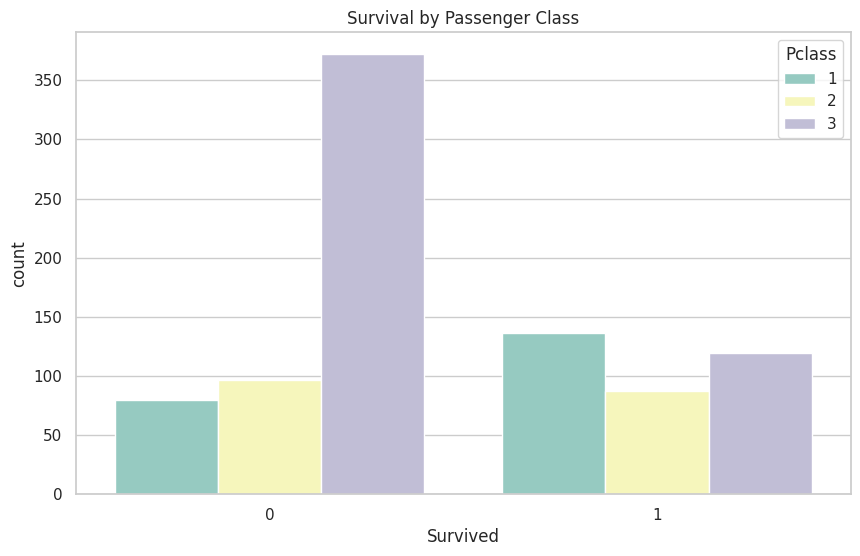

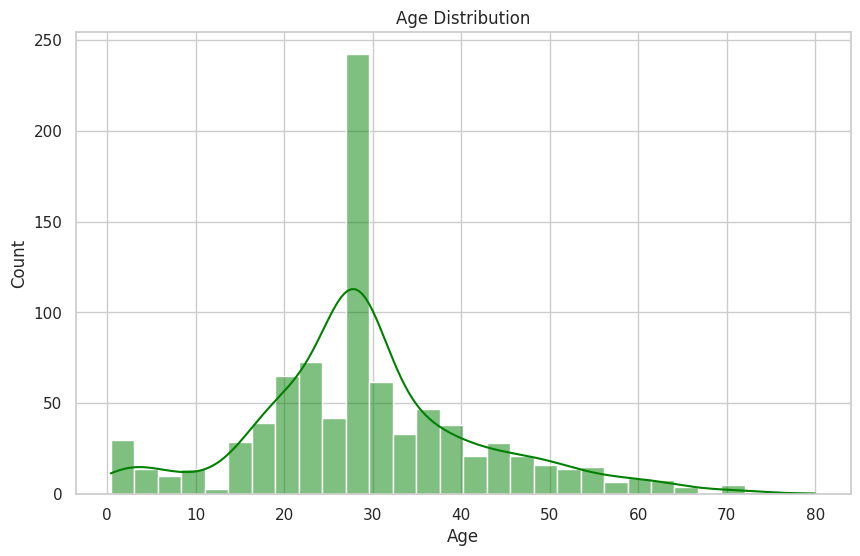

/tmp/ipython-input-2-448529067.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Pclass", y="Age", palette="Set1")


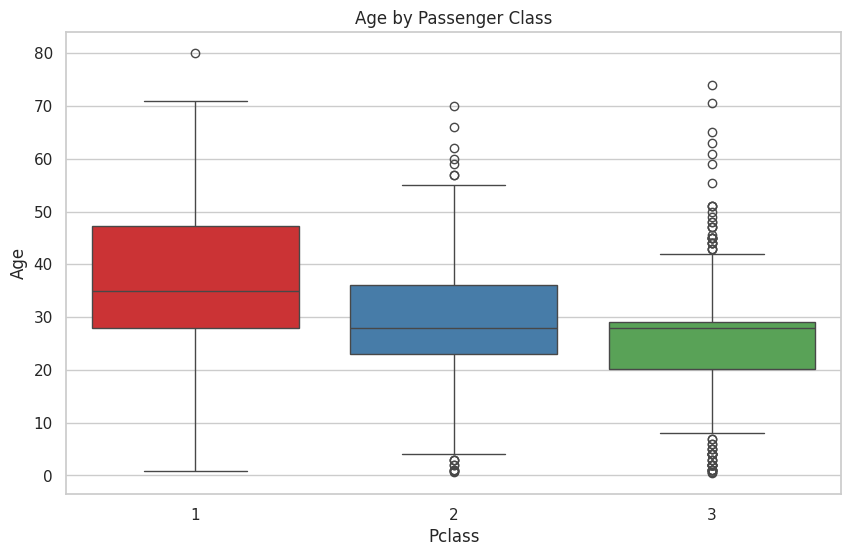

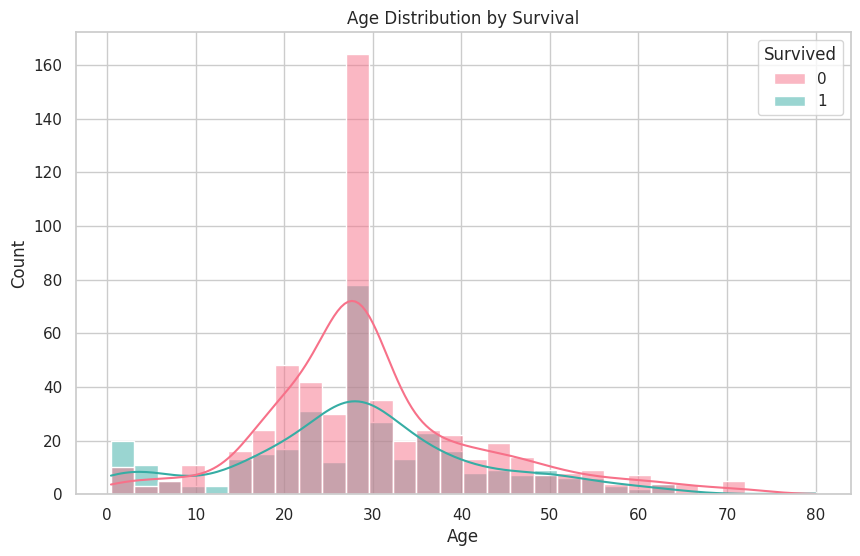

/tmp/ipython-input-2-448529067.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="FamilySize", palette="mako")


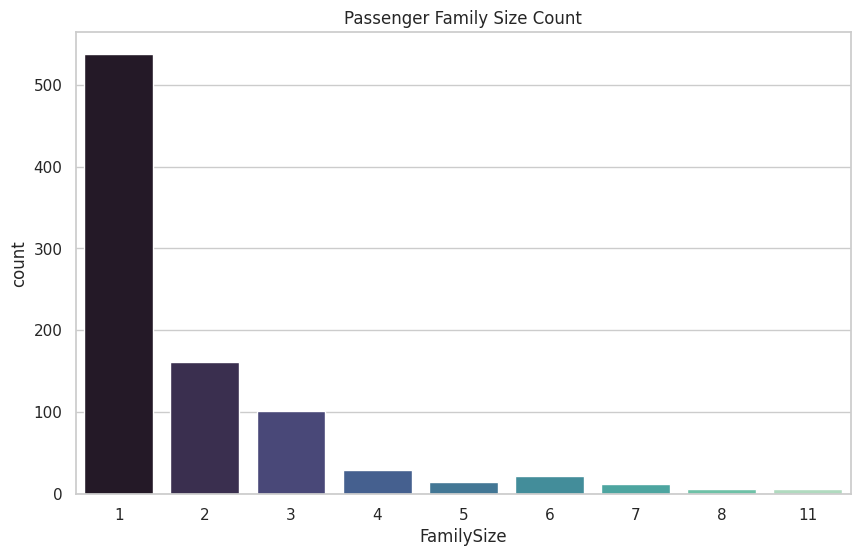

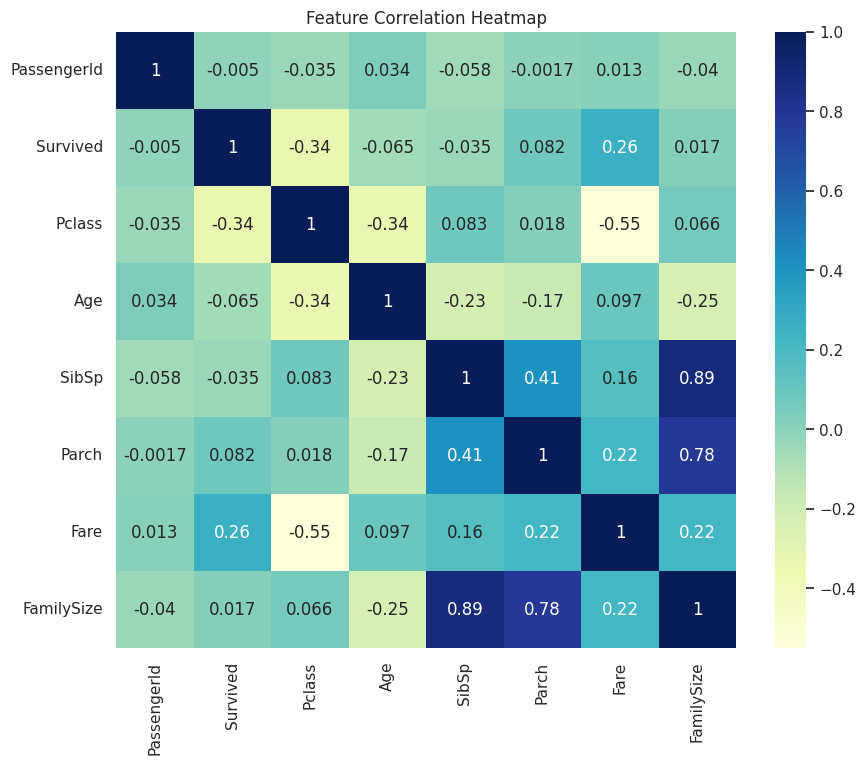

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [2]:
# Titanic EDA Project
# Author: Your Name
# Dataset: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 📥 Load Data
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

# 📊 Basic Information
print("Dataset Info:")
df.info()

# 🔍 Statistical Summary
df.describe()

# 🔍 Check Missing Values
missing = df.isnull().sum()
missing[missing > 0]

# 🔥 Heatmap of Missing Data
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# 🧹 Handling Missing Values
# Fill 'Embarked' with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Fill 'Age' with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Drop 'Cabin' due to too many missing values
df.drop("Cabin", axis=1, inplace=True)

# ✅ Check Again
df.isnull().sum()

# 👀 Survival Count
sns.countplot(data=df, x="Survived", palette="Set2")
plt.title("Survival Count")
plt.show()

# 🎩 Survival by Gender
sns.countplot(data=df, x="Survived", hue="Sex", palette="coolwarm")
plt.title("Survival by Gender")
plt.show()

# 💼 Survival by Class
sns.countplot(data=df, x="Survived", hue="Pclass", palette="Set3")
plt.title("Survival by Passenger Class")
plt.show()

# 📈 Age Distribution
sns.histplot(df["Age"], bins=30, kde=True, color="green")
plt.title("Age Distribution")
plt.show()

# 📊 Boxplot: Age vs Class
sns.boxplot(data=df, x="Pclass", y="Age", palette="Set1")
plt.title("Age by Passenger Class")
plt.show()

# 📊 Age Distribution by Survival
sns.histplot(data=df, x="Age", hue="Survived", bins=30, kde=True, palette="husl")
plt.title("Age Distribution by Survival")
plt.show()

# 👨‍👩‍👧 Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
sns.countplot(data=df, x="FamilySize", palette="mako")
plt.title("Passenger Family Size Count")
plt.show()

# 🎯 Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()

# ✅ Final Data Snapshot
df.head()
